In [196]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
import datetime
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", "Enter token")

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("uvbq-3m68", limit=100, where="issue_date like '%/2018'")

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

date_list = []
month_list = []
time_list = []
hours_list = []
fine_list = []
year_int = 0
month_int = 0
day_int = 0
total_violations = len(results_df)

In [197]:
results_df.head()

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,plate,precinct,reduction_amount,state,summons_image,summons_number,violation,violation_status,violation_time
0,0,K,115,0,03/15/2018,TRAFFIC,NaN,PAS,115,0,HYJ9680,075,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597864552,NO STANDING-DAY/TIME LIMITS,NaN,11:52A
1,0,K,65,0,03/15/2018,TRAFFIC,NaN,PAS,0,0,GVV3761,075,65,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597864539,INSP. STICKER-EXPIRED/MISSING,HEARING HELD-NOT GUILTY,11:34A
2,0,K,115,0,03/15/2018,TRAFFIC,NaN,COM,105,0,42889JM,075,10,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597864618,NO STANDING-BUS STOP,HEARING HELD-GUILTY REDUCTION,12:25P
3,0,Q,115,0,08/07/2018,TRAFFIC,NaN,PAS,115,0,GDN6580,106,0,NY,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8602896220,FIRE HYDRANT,NaN,12:44P
4,45,K,35,0,02/01/2018,POLICE DEPARTMENT,NaN,PAS,0,10,746453C,084,0,TX,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,1417204758,EXPIRED MUNI METER,NaN,01:10P


In [198]:
violation_time_df = results_df["violation_time"]
for time in violation_time_df:
    try:
        if time[-1:] == "A" or int(time[:2]) == 12:
            try:
                hours_int = int(time[:2])
                minutes_int = int(time[3:5])
                issue_time = datetime.time(hours_int, minutes_int)
                print(issue_time)
            except (ValueError):
                print(time)
        elif time[-1:] == "P" and int(time[:2]) != 12:
            try:
                hours_int = int(time[:2]) + 12
                minutes_int = int(time[3:5])
                issue_time = datetime.time(hours_int, minutes_int)
                print(issue_time)
            except (ValueError):
                print(time)
    except (TypeError):
        hours_int = np.NaN
        minutes_int = np.NaN
        issue_time = np.NaN
        print(time)
        
    time_list.append(issue_time)
    hours_list.append(hours_int)

        

11:52:00
11:34:00
12:25:00
12:44:00
13:10:00
13:13:00
18:10:00
15:39:00
08:02:00
08:36:00
12:52:00
12:55:00
01:28:00
01:00:00
09:25:00
09:16:00
14:25:00
09:56:00
09:50:00
17:36:00
09:10:00
13:17:00
13:05:00
15:02:00
16:01:00
16:03:00
14:38:00
11:11:00
10:10:00
20:39:00
20:46:00
21:27:00
22:12:00
21:37:00
12:12:00
12:20:00
11:12:00
07:00:00
07:06:00
16:20:00
07:57:00
08:49:00
09:08:00
09:46:00
12:07:00
14:14:00
08:59:00
12:28:00
12:53:00
08:21:00
13:20:00
07:06:00
14:10:00
12:57:00
13:12:00
13:59:00
15:00:00
12:19:00
05:38:00
12:24:00
15:02:00
17:04:00
11:43:00
17:09:00
08:20:00
16:48:00
12:56:00
16:22:00
10:19:00
12:31:00
17:09:00
17:09:00
18:02:00
17:17:00
08:50:00
11:44:00
12:01:00
09:33:00
09:55:00
15:28:00
15:36:00
13:45:00
13:46:00
17:47:00
10:55:00
13:19:00
09:38:00
13:27:00
13:41:00
08:47:00
17:33:00
12:45:00
13:06:00
16:58:00
14:33:00
17:58:00
13:14:00
18:08:00
12:54:00
12:13:00


In [199]:
issue_date_df = results_df["issue_date"]
for date in issue_date_df:
    try:
        year_int = int(date[-4:])
        month_int = int(date[:2])
        day_int = int(date[3:5])
        ymd = datetime.datetime(year_int, month_int, day_int)
        date_list.append(ymd)
        month_list.append(month_int)
    except (ValueError):
        year_int = np.NaN
        month_int = np.NaN
        day_int = np.NaN
        ymd = np.NaN
        date_list.append(ymd)
        month_list.append(month_int)

In [200]:
fine_amount_df = results_df["fine_amount"]
for fine in fine_amount_df:
    fine_float = float(fine)
    fine_list.append(fine_float)

In [201]:
results_df["Date Issued"] = date_list
results_df["Month Issued"] = month_list
results_df["Time Issued"] = time_list
results_df["Hour Issued"] = hours_list
results_df["Total Fine"] = fine_list

In [202]:
results_df.head()

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,...,summons_image,summons_number,violation,violation_status,violation_time,Date Issued,Month Issued,Time Issued,Hour Issued,Total Fine
0,0,K,115,0,03/15/2018,TRAFFIC,NaN,PAS,115,0,...,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597864552,NO STANDING-DAY/TIME LIMITS,NaN,11:52A,2018-03-15,3,11:52:00,11,115.0
1,0,K,65,0,03/15/2018,TRAFFIC,NaN,PAS,0,0,...,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597864539,INSP. STICKER-EXPIRED/MISSING,HEARING HELD-NOT GUILTY,11:34A,2018-03-15,3,11:34:00,11,65.0
2,0,K,115,0,03/15/2018,TRAFFIC,NaN,COM,105,0,...,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8597864618,NO STANDING-BUS STOP,HEARING HELD-GUILTY REDUCTION,12:25P,2018-03-15,3,12:25:00,12,115.0
3,0,Q,115,0,08/07/2018,TRAFFIC,NaN,PAS,115,0,...,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,8602896220,FIRE HYDRANT,NaN,12:44P,2018-08-07,8,12:44:00,12,115.0
4,45,K,35,0,02/01/2018,POLICE DEPARTMENT,NaN,PAS,0,10,...,{'url': 'http://nycserv.nyc.gov/NYCServWeb/Sho...,1417204758,EXPIRED MUNI METER,NaN,01:10P,2018-02-01,2,13:10:00,13,35.0


In [203]:
date_grouped_df = results_df.groupby(["Month Issued"])
date_offense_count_df = date_grouped_df.count()
date_offense_count_df.head()

,amount_due,county,fine_amount,interest_amount,issue_date,issuing_agency,judgment_entry_date,license_type,payment_amount,penalty_amount,...,state,summons_image,summons_number,violation,violation_status,violation_time,Date Issued,Time Issued,Hour Issued,Total Fine
Month Issued,,,,,,,,,,,,,,,,,,,,,
1,11,11,11,11,11,11,6,11,11,11,...,11,11,11,11,3,11,11,11,11,11
2,11,11,11,11,11,11,0,11,11,11,...,11,11,11,11,1,11,11,11,11,11
3,42,42,42,42,42,42,0,42,42,42,...,42,42,42,42,24,42,42,42,42,42
4,17,17,17,17,17,17,0,17,17,17,...,17,17,17,17,1,17,17,17,17,17
5,7,7,7,7,7,7,0,7,7,7,...,7,7,7,7,0,7,7,7,7,7


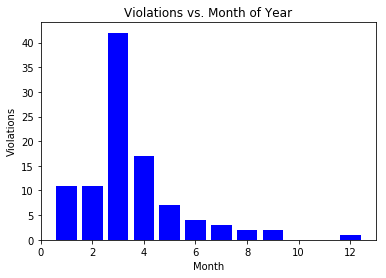

In [204]:
#plt.bar(x_axis, bars_in_cities, color="b", align="center")
plt.bar(date_offense_count_df.index, date_offense_count_df["plate"], color="b", align="center")
plt.title("Violations vs. Month of Year")
plt.xlabel("Month")
plt.ylabel("Violations")
plt.savefig("violations_vs_month.png")


In [205]:
hour_grouped_df = results_df.groupby(["Hour Issued"])
hour_offense_count_df = hour_grouped_df.count()
hour_offense_count_df.head()
hours = 24

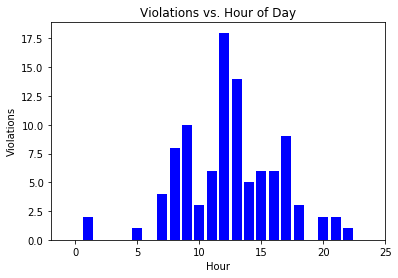

In [206]:
plt.bar(hour_offense_count_df.index, hour_offense_count_df["plate"], color="b", align="center")
plt.xlim(-2, 25)
plt.title("Violations vs. Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Violations")
plt.savefig("violations_vs_hour.png")

In [207]:
violation_grouped_df = results_df.groupby(["violation"])
violation_count_df = violation_grouped_df.count()

#store total fine $ in variable
fine_sum = violation_grouped_df["Total Fine"].sum()

#reduce dataframe to needed columns
violation_count_reduced = pd.DataFrame(violation_count_df["issue_date"])

#rename column to represent total row count which is also total violation count
violation_count_renamed = violation_count_reduced.rename(columns={"issue_date": "Total Count"})

#calculate violation type occurrences as a percentage of total violations
percent_of_violations = (violation_count_renamed["Total Count"]/total_violations)*100

#add percentage of violations in new column
violation_count_renamed["Percent of Total Count"] = percent_of_violations

#add column for total fine
violation_count_renamed["Total Fine"] = fine_sum

#calculate percent of fines
percent_of_fine = round((violation_count_renamed["Total Fine"]/sum(fine_list))*100,2)
violation_count_renamed["Percent of Fine"] = percent_of_fine


violation_count_sorted = violation_count_renamed.sort_values("Total Count", ascending=False)
violation_count_sorted.head()

,Total Count,Percent of Total Count,Total Fine,Percent of Fine
violation,,,,
FAIL TO DSPLY MUNI METER RECPT,26,26.0,1270.0,17.12
EXPIRED MUNI METER,11,11.0,595.0,8.02
NO PARKING-STREET CLEANING,11,11.0,555.0,7.48
NO PARKING-DAY/TIME LIMITS,8,8.0,490.0,6.60
FIRE HYDRANT,7,7.0,805.0,10.85


In [208]:
violation_count_top_10 = violation_count_sorted.iloc[:10]
violation_count_top_10


,Total Count,Percent of Total Count,Total Fine,Percent of Fine
violation,,,,
FAIL TO DSPLY MUNI METER RECPT,26,26.0,1270.0,17.12
EXPIRED MUNI METER,11,11.0,595.0,8.02
NO PARKING-STREET CLEANING,11,11.0,555.0,7.48
NO PARKING-DAY/TIME LIMITS,8,8.0,490.0,6.60
FIRE HYDRANT,7,7.0,805.0,10.85
NO STANDING-BUS STOP,7,7.0,805.0,10.85
NO STANDING-DAY/TIME LIMITS,7,7.0,805.0,10.85
DOUBLE PARKING,5,5.0,575.0,7.75
INSP. STICKER-EXPIRED/MISSING,4,4.0,260.0,3.50


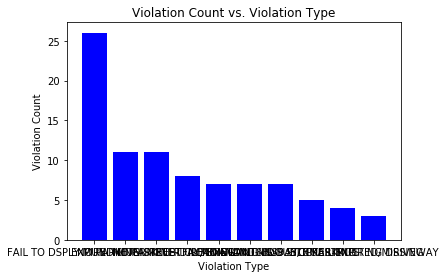

In [209]:
plt.bar(violation_count_top_10.index, violation_count_top_10["Total Count"], color="b", align="center")
plt.title("Violation Count vs. Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("Violation Count")
plt.savefig("violation_count_vs_type.png")

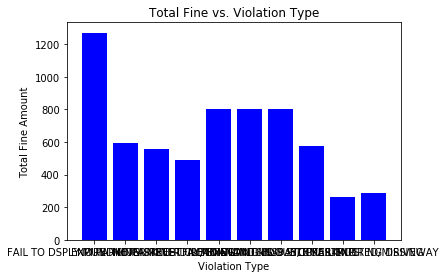

In [210]:
plt.bar(violation_count_top_10.index, violation_count_top_10["Total Fine"], color="b", align="center")
plt.title("Total Fine vs. Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("Total Fine Amount")
plt.savefig("fine_amount_vs_violation_type.png")